In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)
# rotation_range is measured in radiets
# width_shift_range /height... in % of the width of the image, so 0.1 = 10%
# 

In [16]:
chosen_image = random.choice(os.listdir('data/dogs-vs-cats/train/dog'))

In [17]:
image_path = 'data/dogs-vs-cats/train/dog/' + chosen_image

In [27]:
image = np.expand_dims(plt.imread(image_path),0)
image.shape

(1, 479, 353, 3)

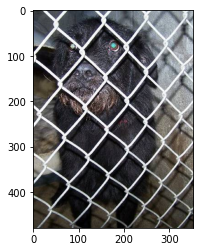

In [31]:
plt.imshow(image[0])

In [32]:
aug_iter = gen.flow(image)
# Its a NumpyArrayIterator, thats why we should have expanded the dims
# we need rank 4, when reading image we have a rank 3
# The flow() function takes numpy data and generates batches of augmented data.

In [33]:
# Get 10 samples of agumented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

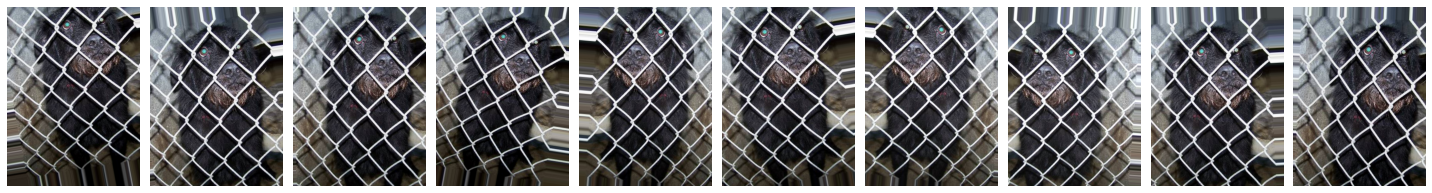

In [34]:
# And plot them
plotImages(aug_images)